In [2]:
# %cd /content/drive/MyDrive/Colab Notebooks/fastai-practice

# !git config --global user.email 'intaek428@gmail.com'
# !git config --global user.name 'ITHwang'

# !git add .
# !git commit -m '4.4.1까지'
# !git push

!pip install -Uqq fastbook

import fastbook
from fastai.vision.all import *

In [4]:
path = untar_data(URLs.PETS)

In [5]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/annotations'),Path('/root/.fastai/data/oxford-iiit-pet/images')]

In [6]:
(path/'images').ls()

(#7393) [Path('/root/.fastai/data/oxford-iiit-pet/images/american_bulldog_139.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/boxer_2.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/newfoundland_23.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/samoyed_164.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/scottish_terrier_33.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/english_setter_145.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/wheaten_terrier_165.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/leonberger_97.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/great_pyrenees_142.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_90.jpg')...]

In [7]:
frame = (path/'images').ls()[0]
frame

Path('/root/.fastai/data/oxford-iiit-pet/images/american_bulldog_139.jpg')

In [8]:
re.findall(r'(.+)_\d+.jpg$', frame.name)

['american_bulldog']

In [9]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/'images')
dls

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


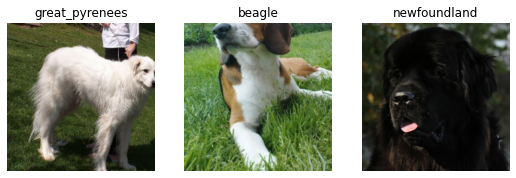

In [10]:
dls.show_batch(nrows=1, ncols=3)

In [11]:
pets.summary(path/'images')

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_128.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=333x500
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_128.jpg
    applying partial gives
      staffordshire_bull_terrier
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(34)

Final sample: (PILImage mode=RGB size=333x500, TensorCategory(34))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 's

In [12]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.509623,0.307863,0.094046,01:59


epoch,train_loss,valid_loss,error_rate,time
0,0.508603,0.344013,0.103518,02:32
1,0.320247,0.219720,0.073748,02:31


In [13]:
x, y = dls.one_batch()
y

TensorCategory([19,  7, 11, 20,  0, 10, 27, 23,  0,  3,  3, 24,  8, 15,  4, 28, 13,  1, 31,  6, 34, 13, 19,  3, 30, 14,  6, 11,  4, 20, 22,  6, 10, 15, 23,  0, 22, 11, 11,  8, 29, 17, 17, 33, 30,  2, 27, 26,
        10, 35,  1, 32,  4,  1, 24, 33, 18, 13, 19,  1, 35, 32,  9, 32], device='cuda:0')

In [14]:
preds, _ = learn.get_preds(dl=[(x, y)])
preds[0]

TensorBase([1.1131e-07, 2.7489e-06, 9.3727e-07, 4.2143e-07, 1.6886e-07, 2.0791e-05, 2.5990e-07, 3.2360e-07, 5.3742e-07, 7.3976e-07, 1.3759e-08, 1.5755e-05, 5.7336e-07, 2.1529e-07, 4.7057e-07, 6.8898e-08,
        2.8688e-07, 4.8956e-08, 8.9950e-06, 9.9984e-01, 8.8113e-05, 1.0488e-06, 9.6334e-06, 2.3732e-07, 1.2774e-06, 6.4259e-08, 1.5089e-08, 1.6421e-06, 6.9307e-09, 3.8579e-08, 2.4297e-07, 1.1927e-07,
        1.2760e-07, 1.4888e-08, 3.1669e-08, 1.0640e-06, 5.2189e-07])

In [15]:
def plot_function(f, tx=None, ty=None, title=None, min=-2, max=2, figsize=(6,4)):
    x = torch.linspace(min,max)
    fig,ax = plt.subplots(figsize=figsize)
    ax.plot(x,f(x))
    if tx is not None: ax.set_xlabel(tx)
    if ty is not None: ax.set_ylabel(ty)
    if title is not None: ax.set_title(title)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Not providing a value for linspace's steps is deprecated and will throw a runtime error in a future release. This warning will appear only once per process. (Triggered internally at  ../aten/src/ATen/native/RangeFactories.cpp:23.)
  


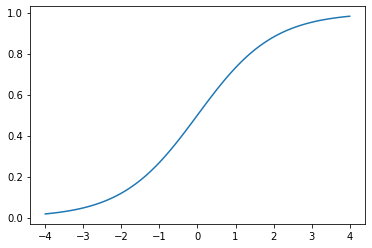

In [16]:
plot_function(torch.sigmoid, min=-4, max=4)

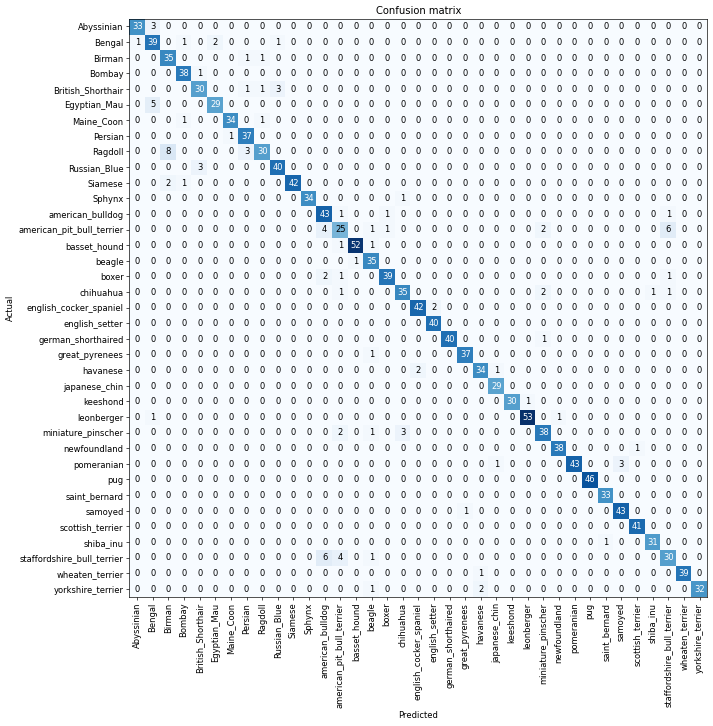

In [18]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12, 12), dpi=60)

In [19]:
interp.most_confused(min_val=5)

[('Ragdoll', 'Birman', 8),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 6),
 ('staffordshire_bull_terrier', 'american_bulldog', 6),
 ('Egyptian_Mau', 'Bengal', 5)]

ValueError: ignored

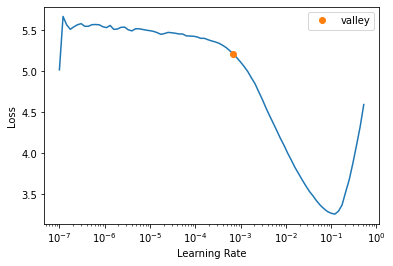

In [20]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
lr_min, lr_steep = learn.lr_find()

In [21]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.176290,0.330863,0.104871,02:03
1,0.519172,0.229003,0.083221,02:04
2,0.328318,0.215742,0.077131,02:04


In [23]:
learn.unfreeze()

SuggestedLRs(valley=7.585775892948732e-05)

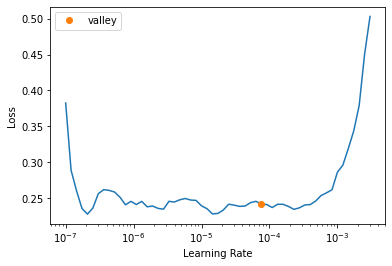

In [24]:
learn.lr_find()

In [25]:
learn.fit_one_cycle(6, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.256718,0.207750,0.072395,02:39
1,0.261965,0.191920,0.064953,02:37
2,0.215781,0.191589,0.065629,02:37
3,0.196727,0.185796,0.066306,02:34
4,0.184486,0.179234,0.063599,02:33
5,0.190105,0.184982,0.062246,02:34


In [27]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)
learn.unfreeze()
learn.fit_one_cycle(12, lr_max=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.205536,0.343985,0.106901,02:11
1,0.534614,0.254841,0.082544,02:10
2,0.331053,0.217333,0.069689,02:02


epoch,train_loss,valid_loss,error_rate,time
0,0.273287,0.217900,0.070365,02:34
1,0.251913,0.214137,0.066982,02:34
2,0.244569,0.208000,0.069689,02:35
3,0.220839,0.196897,0.063599,02:35
4,0.200001,0.195020,0.064953,02:34


KeyboardInterrupt: ignored

In [ ]:
learn.recorder.plot_loss()

In [28]:
from fastai.callback.fp16 import *
learn = cnn_learner(dls, resnet50, metrics=error_rate).to_fp16()
learn.fine_tune(6, freeze_epochs=3)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time


KeyboardInterrupt: ignored

In [29]:
%cd /content/drive/MyDrive/Colab Notebooks/fastai-practice

!git config --global user.email 'intaek428@gmail.com'
!git config --global user.name 'ITHwang'

!git add .
!git commit -m 'chap5 끝'
# !git push


/content/drive/MyDrive/Colab Notebooks/fastai-practice
[master e945eaf] chap5 끝
 1 file changed, 1 insertion(+), 1 deletion(-)
 rewrite fastai_chap5.ipynb (91%)


In [30]:
!git push

Counting objects: 3, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 109.27 KiB | 3.64 MiB/s, done.
Total 3 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/ITHwang/fastai-practice.git
   c039b2d..e945eaf  master -> master
